### Marketing_EDA_Stats

Exploratory Analysis and Insights and Statistical Tests to increase the profit of a marketing campaign.

Link Dataset: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data

In [1]:
## Install
!pip install -q missingno

In [2]:
### Imports

import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
## 
import warnings
warnings.filterwarnings('ignore')

### Extration

In [3]:
### Import Dataset

data = pd.read_csv("marketing_campaign.csv", sep=";")

In [4]:
data.shape

(2240, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


### Transform

### Criar dicionario de dados referente ao nome das colunas

In [7]:
data_dictionary = {
    "Year_Birth" : "Data_Nascimento",
    "Education" : "Educacao",
    "Marital_Status" : "Estado_Civil", 
    "Income" : "Renda",
    "Kidhome" : "Criancas_Em_Casa",
    "Teenhome" : "Adolescentes_Em_Casa",
    "Dt_Customer" : "Data_Cadastro_Cliente",
    "Recency" : "Dias_Ultima_Compra",
    "MntWines" : "Gasto_Vinhos",
    "MntFruits" : "Gasto_Frutas",
    "MntMeatProducts" : "Gasto_Carnes",
    "MntFishProducts" : "Gasto_Peixes",
    "MntSweetProducts" : "Gasto_Doces",
    "MntGoldProds" : "Gasto_Outros",
    "NumDealsPurchases" : "Num_Compras_Promocionais",
    "NumWebPurchases" : "Num_Compras_Web",
    "NumCatalogPurchases" : "Num_Compras_Catalogo",
    "NumStorePurchases" : "Num_Compras_Loja",
    "NumWebVisitsMonth" : "Num_Visitas_Web_Mes",
    "AcceptedCmp3" : "Aceitou_Campanha_3",
    "AcceptedCmp4" : "Aceitou_Campanha_4",
    "AcceptedCmp5" : "Aceitou_Campanha_5",
    "AcceptedCmp1" : "Aceitou_Campanha_1",
    "AcceptedCmp2" : "Aceitou_Campanha_2",
    "Complain" : "Reclamou",
    "Z_CostContact" : "Z_Custo_Contato",
    "Z_Revenue" : "Z_Receita",
    "Response" : "Aceitou_Ultima_Campanha",    
}

In [8]:
data_dictionary['Kidhome']

'Criancas_Em_Casa'

In [9]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
### Alterando formato Dt_Customer para formato data
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

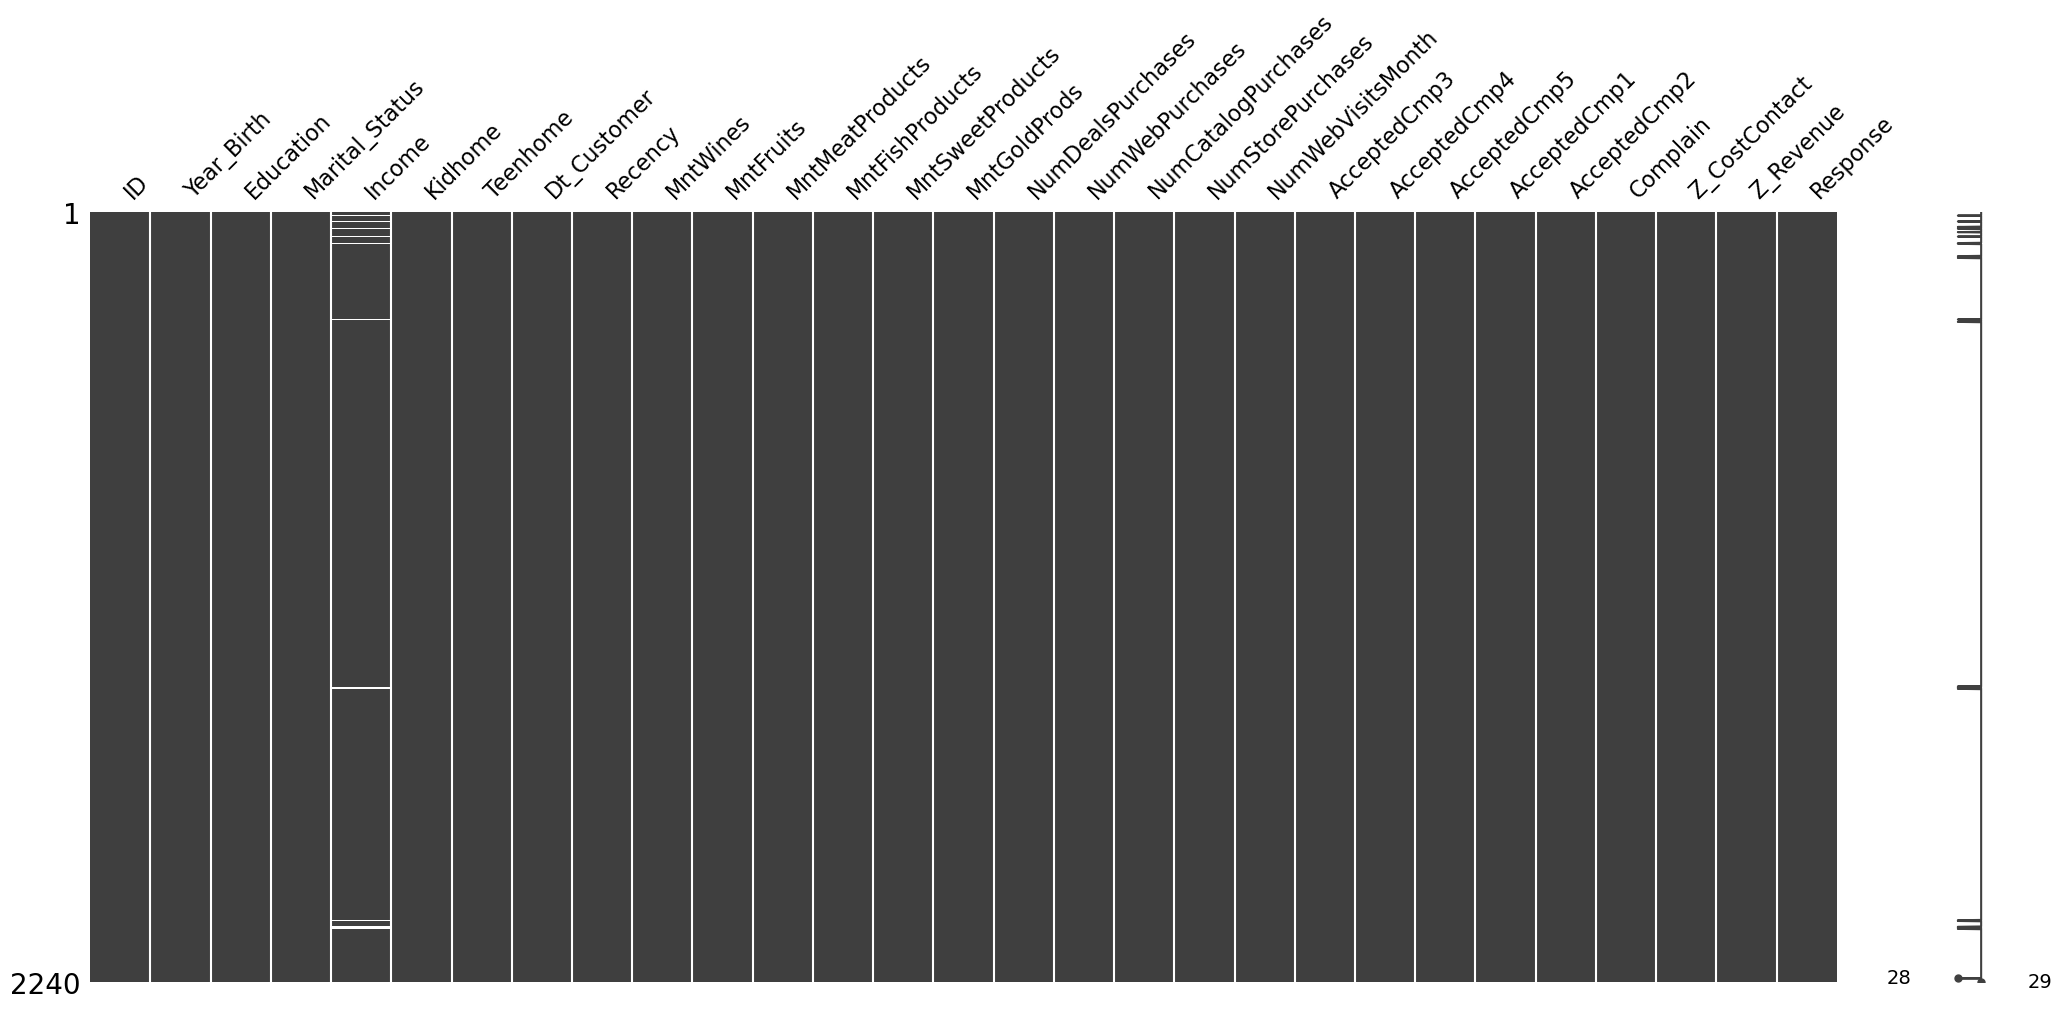

In [13]:
### Verificando Valores Ausentes
msno.matrix(data)
plt.show()

In [14]:
missing_values = data.isnull().sum().sort_values(ascending= False)
print(missing_values.loc[missing_values != 0])

Income    24
dtype: int64


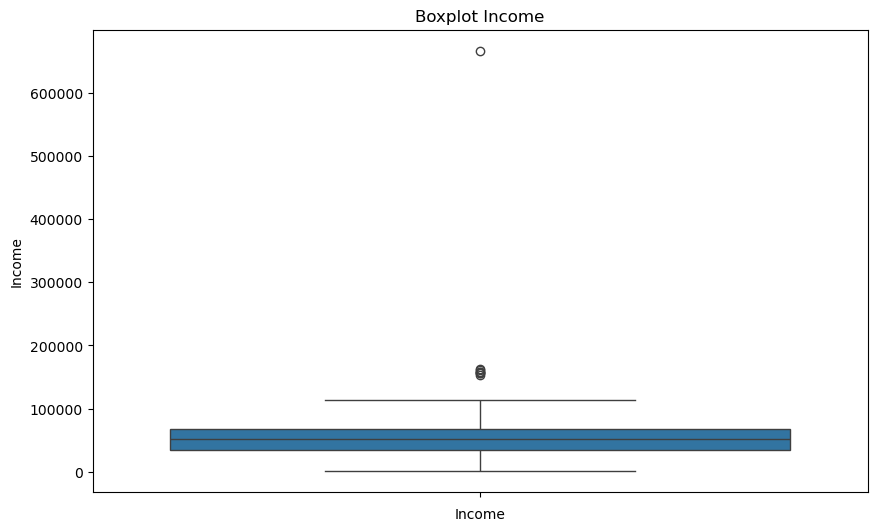

In [15]:
#Verificando outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['Income'])
plt.title('Boxplot Income')
plt.xlabel('Income')
plt.show()

In [16]:
# Estatistica para identificar outliers
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3-Q1

In [17]:
#Limites para ponto outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
#Identificando outliers
outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


<Figure size 1000x600 with 0 Axes>

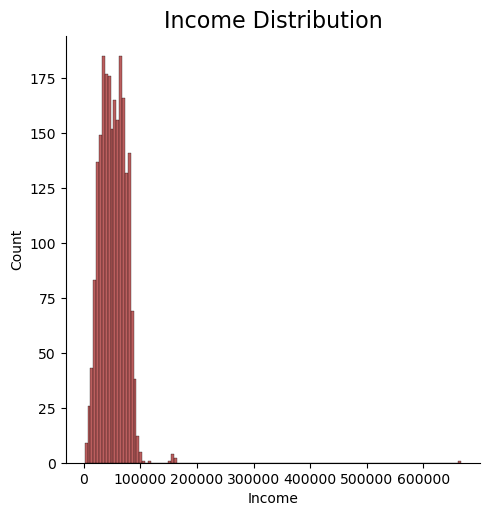

In [19]:
# Distribuição da varíável 'Income'
plt.figure(figsize = (10, 6))

sns.displot(data['Income'], color = 'brown')

plt.title('Income Distribution', size = 16)

plt.show()

In [20]:
## Remoção dos outliers pois são poucos registros
data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

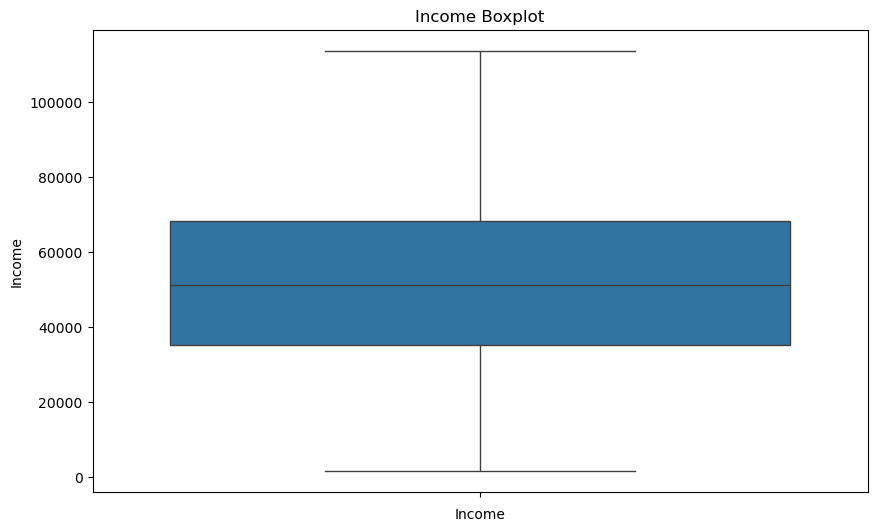

In [21]:
## Plot outliers após remoção

plt.figure(figsize= (10, 6))

sns.boxplot(data['Income'])
plt.title('Income Boxplot')
plt.xlabel('Income')
plt.show()

<Figure size 1000x600 with 0 Axes>

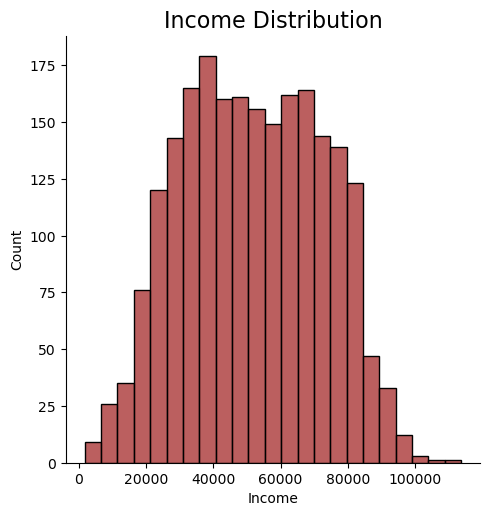

In [22]:
# Distribuição da variável Income após remoção
plt.figure(figsize = (10, 6))

sns.displot(data['Income'], color = 'brown')

plt.title('Income Distribution', size = 16)

plt.show()

##### Tratativa de Valores Ausentes com KNN (k-nearest neighbors)

In [23]:
## Normalização

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Income']])

In [24]:
# KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [25]:
# Imputa valore ausentes
data_imputed = imputer.fit_transform(data_scaled)

In [26]:
## Converte para formata original
data['Income'] = scaler.inverse_transform(data_imputed)

In [27]:
print('Sum missing values:' , data.isnull().sum().sum())

Sum missing values: 0


In [28]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Exploratory Analysis and Attribute Engineering

In [29]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [30]:
# Drop em memoria da colunas categoricas para grafico boxplot das colunas quantitativas

data_boxplot = data.drop(columns= ['ID',
                                   'Education',
                                   'Marital_Status',
                                   'Kidhome',
                                   'Teenhome',
                                   'Dt_Customer',
                                   'AcceptedCmp3', 
                                   'AcceptedCmp4', 
                                   'AcceptedCmp5', 
                                   'AcceptedCmp1',
                                   'AcceptedCmp2', 
                                   'Complain', 
                                   'Z_CostContact', 
                                   'Z_Revenue', 
                                   'Response'])

In [31]:
data_dictionary['Complain']

'Reclamou'

In [32]:

data_dictionary['Z_CostContact']


'Z_Custo_Contato'

In [33]:
data_dictionary['Z_Revenue']


'Z_Receita'

In [34]:
data_dictionary['Response']

'Aceitou_Ultima_Campanha'

In [35]:
data_boxplot.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

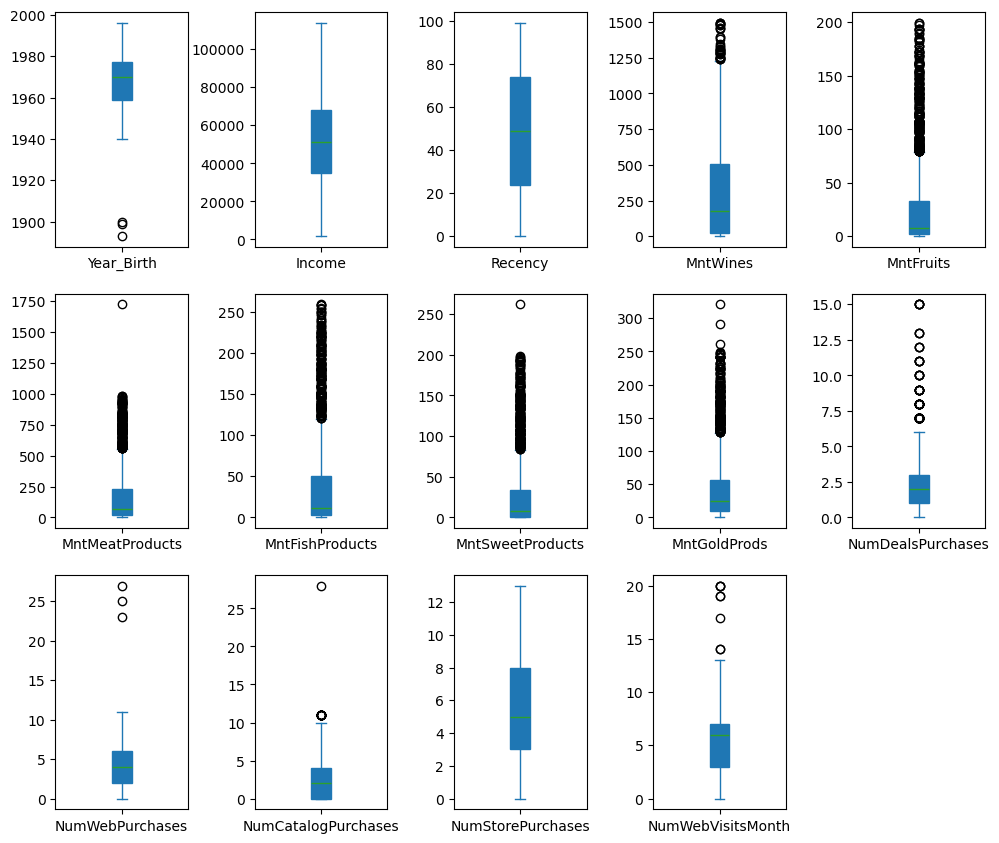

In [36]:
#Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12, 14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

In [37]:
# Nova coluna com Idade de cada cliente

current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

In [38]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43


In [39]:
# Nova coluna com numero de dias como cliente desde data cadastro

data['Days_as_Customer'] = data['Dt_Customer'].max() - data['Dt_Customer']

In [40]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,663 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,113 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,312 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,139 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,161 days


In [41]:
# Removendo "Days"

data['Days_as_Customer'] = data['Days_as_Customer'].astype(str).str.replace(' days', '')

In [42]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,161


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-null   i

In [44]:
# Ajuste tipo de dado de "Days a Customer"

data['Days_as_Customer'] = pd.to_numeric(data['Days_as_Customer'], downcast= 'integer')

In [45]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Days_as_Customer'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-null   i

In [47]:
data_dictionary['NumDealsPurchases']

'Num_Compras_Promocionais'

In [48]:
# Nova Coluna para total de compras realizadas no 3 diferentes canais

data['Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [49]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,67,663,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,70,113,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,59,312,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,40,139,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,43,161,14


In [50]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Days_as_Customer', 'Total_Purchases'],
      dtype='object')

In [51]:
data_dictionary['MntFishProducts']

'Gasto_Peixes'

In [52]:
## Nova variável 'Total Expense'
data['Total_Expenses'] = data.filter(like = 'Mnt').sum(axis=1)

In [53]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchases,Total_Expenses
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,67,663,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,70,113,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,59,312,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,40,139,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,43,161,14,422


In [54]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Days_as_Customer', 'Total_Purchases', 'Total_Expenses'],
      dtype='object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-null   i

In [56]:
data['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2066
1     142
Name: count, dtype: int64

In [57]:
data['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2178
1      30
Name: count, dtype: int64

In [58]:
# Nova variavel para verificar se aceitou qualquer umas das campanhas

data['Accepted_Campaign'] = data.filter(like = 'Accepted').sum(axis=1)

In [59]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Accepted_Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,67,663,22,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,70,113,4,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,59,312,20,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,40,139,6,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,43,161,14,422,0


In [60]:
data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Accepted_Campaign
1369,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,3,11,0,66,47,10,251,0
937,1204,1970,PhD,Married,67536.0,0,1,2013-05-22,45,1253,...,0,0,3,11,0,54,403,27,1829,1
1878,1570,1951,PhD,Together,69702.0,0,1,2013-02-19,8,664,...,0,0,3,11,0,73,495,24,1039,0
1205,1118,1956,Master,Married,50965.0,0,1,2013-02-20,87,544,...,0,0,3,11,0,68,494,19,685,1
1858,9029,1972,PhD,Married,70116.0,0,0,2013-01-26,73,707,...,0,0,3,11,0,52,519,22,1536,0
1860,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,...,0,0,3,11,0,58,599,13,928,0
1863,3254,1971,Graduation,Married,70886.0,1,0,2013-10-14,65,407,...,0,0,3,11,0,53,258,13,960,0
1266,5207,1963,PhD,Married,53378.0,1,1,2012-09-24,41,489,...,0,0,3,11,1,61,643,19,793,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,0,3,11,0,61,6,0,9,0
760,10270,1981,2n Cycle,Married,35523.0,1,0,2013-10-03,8,11,...,0,0,3,11,0,43,269,6,66,0


In [61]:
# Nova Coluna para mudar tipo de dado da coluna 'Accepted_Campaign'

data['Response_Campaign'] = data['Accepted_Campaign'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

In [62]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Accepted_Campaign,Response_Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,67,663,22,1617,0,Not Accepted
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,70,113,4,27,0,Not Accepted
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,59,312,20,776,0,Not Accepted
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,40,139,6,53,0,Not Accepted
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,43,161,14,422,0,Not Accepted


In [63]:
data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Accepted_Campaign,Response_Campaign
100,1473,1960,2n Cycle,Single,47823.0,0,1,2013-07-23,0,53,...,0,3,11,0,64,341,5,72,0,Not Accepted
512,5389,1964,Graduation,Married,48920.0,0,2,2013-10-20,93,238,...,0,3,11,0,60,252,13,347,1,Accepted
1944,5015,1976,Master,Married,34529.0,1,0,2012-09-14,94,68,...,0,3,11,0,48,653,7,162,0,Not Accepted
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,0,3,11,0,40,470,6,84,1,Accepted
50,8614,1957,Graduation,Widow,65486.0,0,1,2014-05-12,29,245,...,0,3,11,0,67,48,16,507,0,Not Accepted
377,4459,1989,Graduation,Single,30279.0,1,0,2012-12-30,13,10,...,0,3,11,0,35,546,4,37,0,Not Accepted
1138,10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,...,0,3,11,0,35,38,6,30,0,Not Accepted
1976,5117,1963,2n Cycle,Married,32632.0,0,0,2012-08-02,32,63,...,0,3,11,0,61,696,16,576,0,Not Accepted
2119,6147,1971,Graduation,Divorced,25818.0,1,0,2012-10-18,51,5,...,0,3,11,0,53,619,3,28,0,Not Accepted
1851,11148,1975,Graduation,Together,22280.0,1,0,2013-05-19,85,2,...,0,3,11,0,49,406,3,13,0,Not Accepted


In [64]:
data['Response_Campaign'].value_counts()

Response_Campaign
Not Accepted    1749
Accepted         459
Name: count, dtype: int64

In [65]:
# Amostra das novas variaveis

data[['Age', 'Days_as_Customer', 'Total_Purchases', 'Total_Expenses', 'Response_Campaign']].sample(10)

,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Response_Campaign
1956,48,163,4,20,Not Accepted
129,68,50,19,661,Not Accepted
1597,40,257,12,339,Accepted
1339,42,690,11,299,Not Accepted
459,42,642,18,1289,Not Accepted
1400,63,673,11,289,Not Accepted
1795,64,380,4,43,Not Accepted
2071,68,186,19,715,Not Accepted
161,79,601,25,1706,Not Accepted
85,64,322,5,56,Not Accepted


In [66]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Days_as_Customer', 'Total_Purchases', 'Total_Expenses',
       'Accepted_Campaign', 'Response_Campaign'],
      dtype='object')

In [67]:
## Removendo colunas desnecessárias
data.drop(['Year_Birth', 'Dt_Customer', 'Accepted_Campaign', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)

In [68]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Response_Campaign
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,67,663,22,1617,Not Accepted
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,70,113,4,27,Not Accepted
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,59,312,20,776,Not Accepted
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,40,139,6,53,Not Accepted
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,43,161,14,422,Not Accepted


In [69]:
data.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Days_as_Customer,Total_Purchases,Total_Expenses
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5586.900815,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,...,5.334239,0.073822,0.074275,0.073370,0.064312,0.013587,55.192935,353.507246,12.562500,606.875906
std,3249.110303,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,...,2.413837,0.261541,0.262278,0.260801,0.245363,0.115795,11.991913,202.547352,7.180228,602.090272
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,5.000000
25%,2814.750000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,180.000000,6.000000,69.000000
50%,5458.500000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,355.000000,12.000000,397.000000
75%,8418.500000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,529.000000,18.000000,1047.250000
max,11191.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,699.000000,32.000000,2525.000000


#### Insights com Analise Multivariada

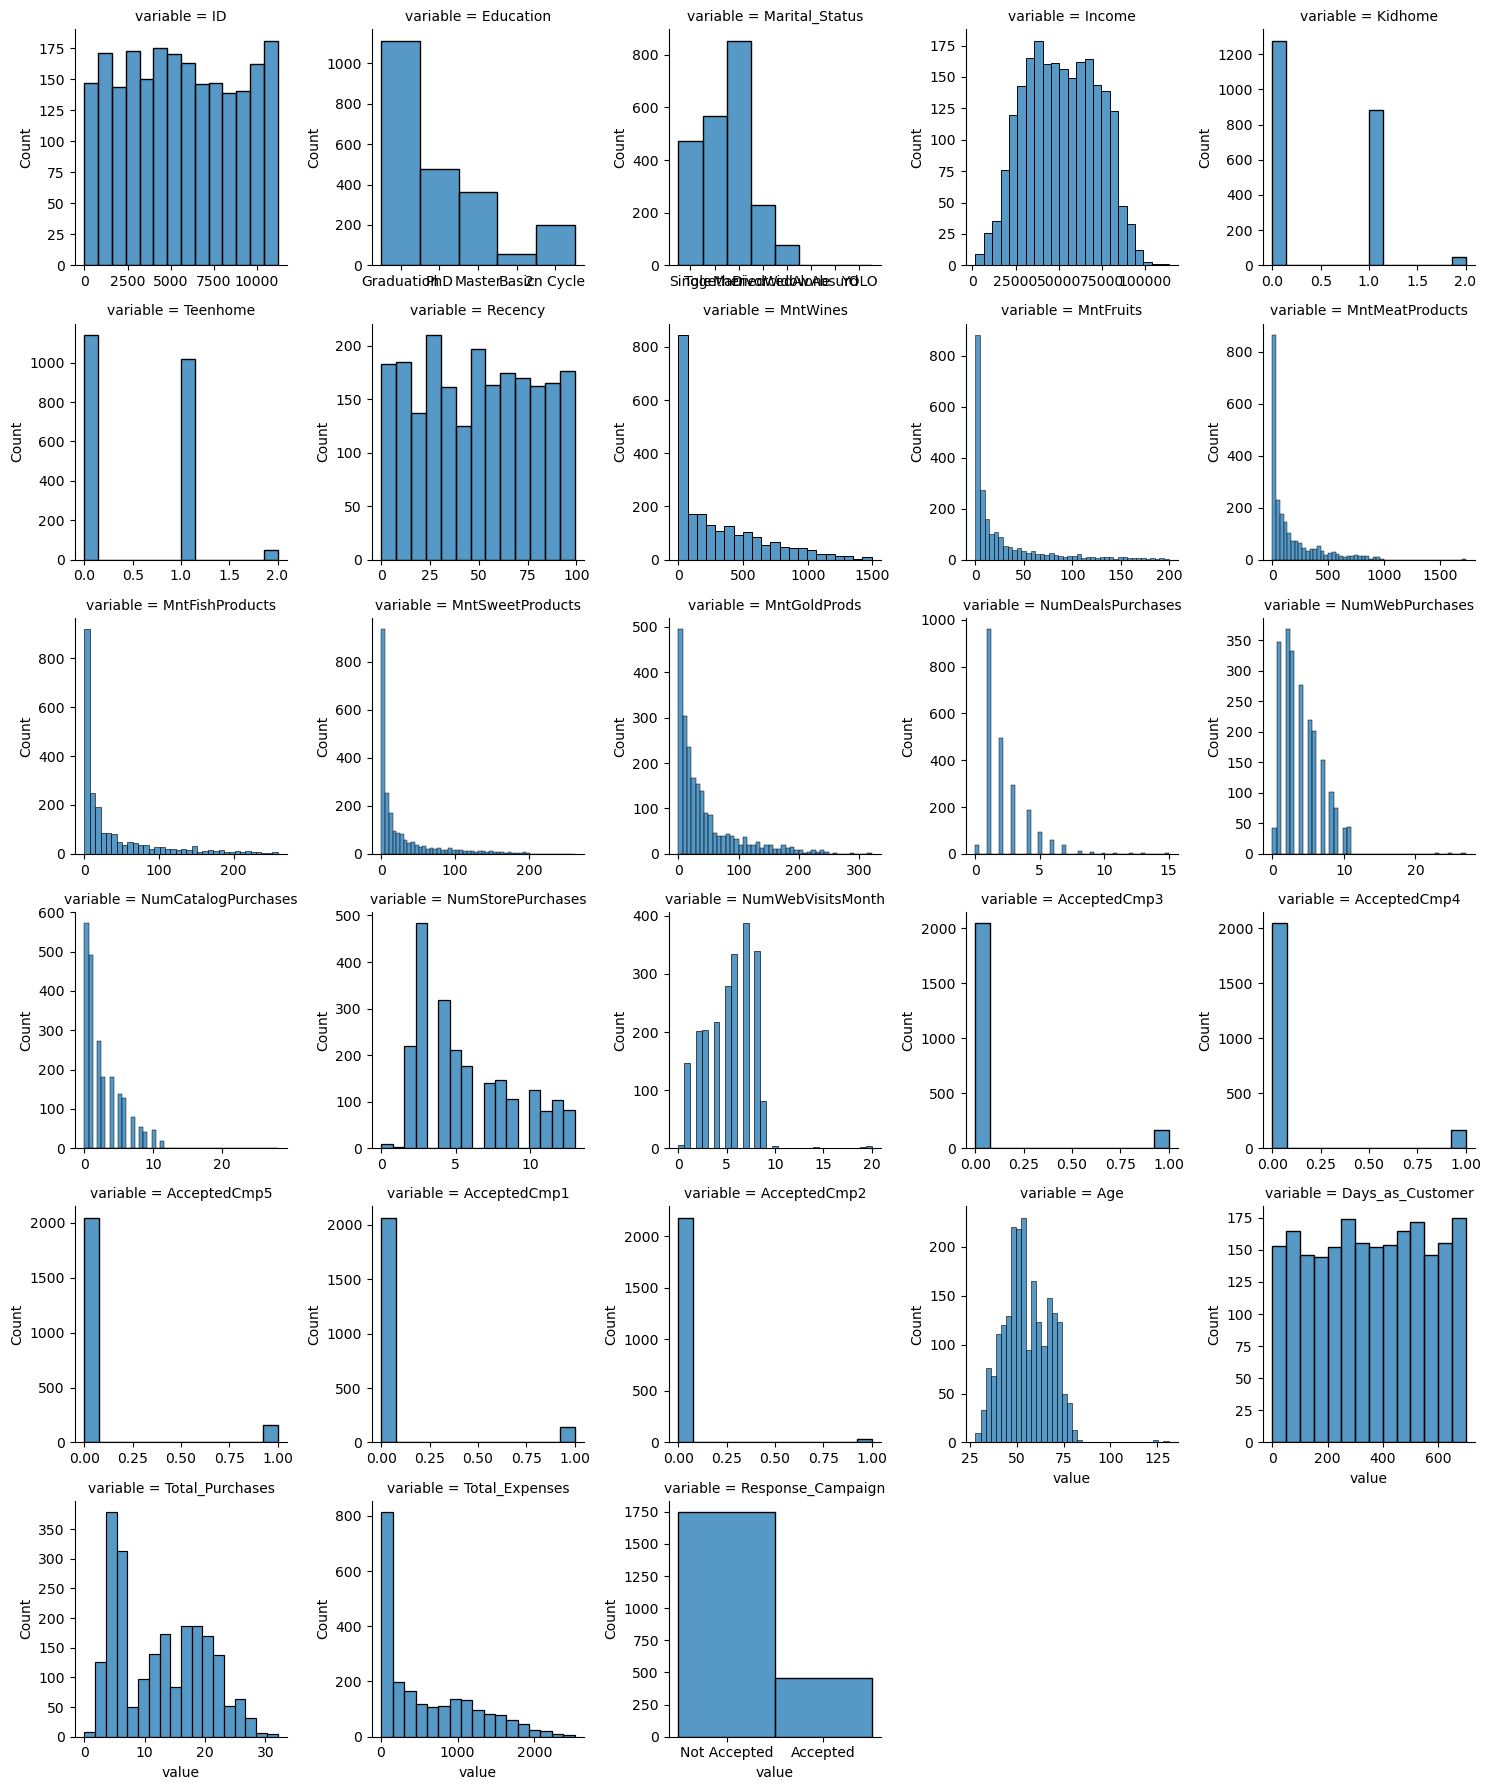

In [70]:
# Distribuição das variáveis

hist = pd.melt(data, value_vars= data)
hist = sns.FacetGrid (hist, col = 'variable', col_wrap= 5, sharex= False, sharey=False)
hist.map(sns.histplot, 'value')

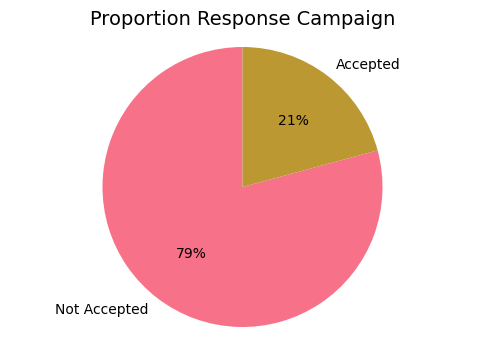

In [71]:
## Qual a proporção de clientes que aceitaram ou não a campanha

fig, ax = plt.subplots(figsize = (6, 4))

counts = data['Response_Campaign'].value_counts()
labels = counts.index.tolist()

colors = sns.color_palette('husl')

ax.pie(counts, labels = labels, colors = colors, autopct= '%.0f%%', startangle=90)

ax.set_title('Proportion Response Campaign', fontsize = 14)

ax.axis('equal')

plt.show()

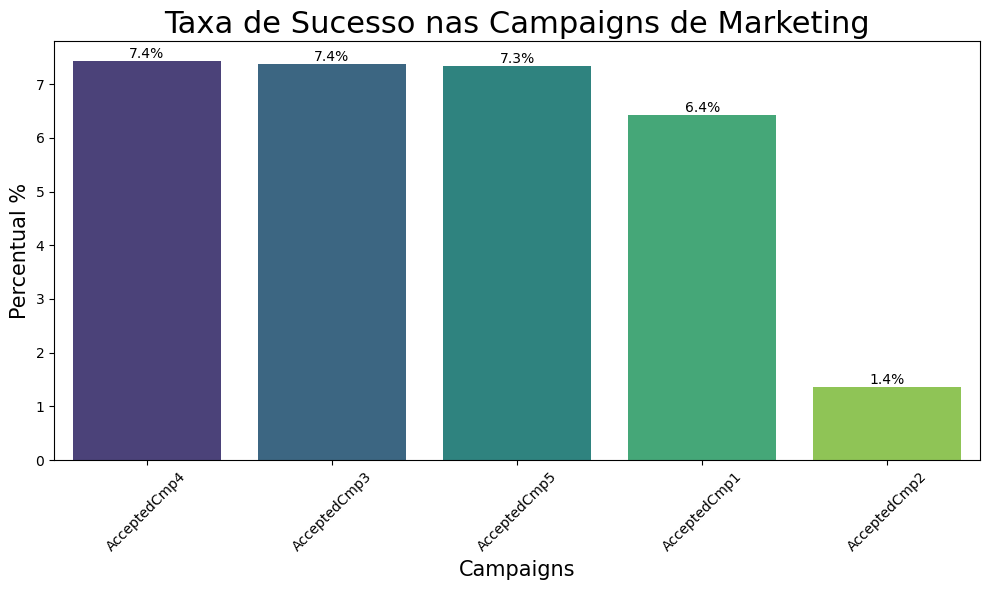

In [72]:
# Lista de campanhas
campaigns = [ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Calcula o percentual
df_campaigns = pd.DataFrame(data[campaigns].mean() * 100, columns = ['Percent']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = df_campaigns.sort_values('Percent', ascending = False), palette='viridis')

# Labels
plt.xlabel('Campaigns', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de Sucesso nas Campaigns de Marketing', size = 22)

# Inclui o percentual no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom')

# Inclina os rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Display 
plt.tight_layout()
plt.show()

In [73]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age',
       'Days_as_Customer', 'Total_Purchases', 'Total_Expenses',
       'Response_Campaign'],
      dtype='object')

In [74]:
### Verificando Idade x Total Compras

### Filtrando colunas categóricas

df_corr = data.drop(['ID', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response_Campaign'], axis = 1).corr()

In [75]:
column_corr = df_corr.loc['Age']

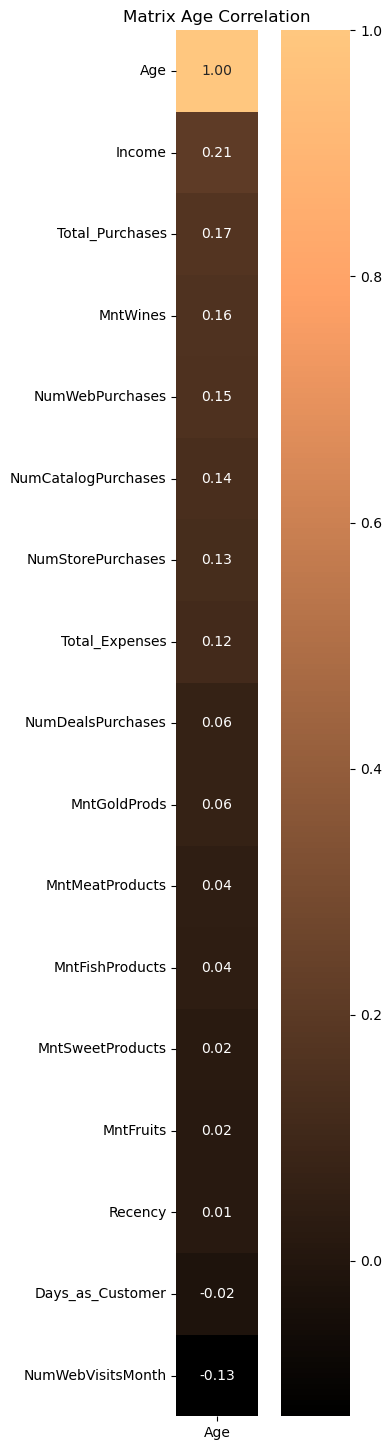

In [76]:
plt.figure(figsize= (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending= False)),
            annot=True,
            cmap= 'copper',
            cbar= True,
            square= True,
            fmt = '.2f')
plt.title('Matrix Age Correlation')
plt.show()

In [77]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age',
       'Days_as_Customer', 'Total_Purchases', 'Total_Expenses',
       'Response_Campaign'],
      dtype='object')

<Axes: xlabel='Response_Campaign', ylabel='Total_Expenses'>

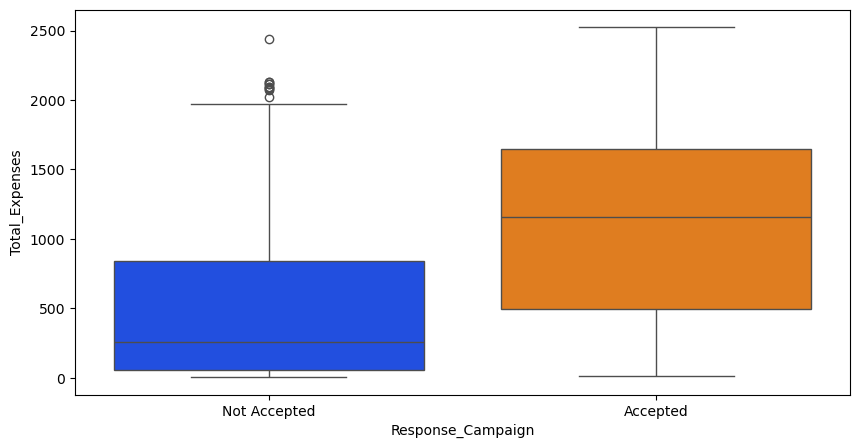

In [78]:
### Total de Compras x Resposta a Campanhas

plt.figure(figsize=(10, 5))
sns.boxplot(x = 'Response_Campaign', y='Total_Expenses', data = data, palette='bright')

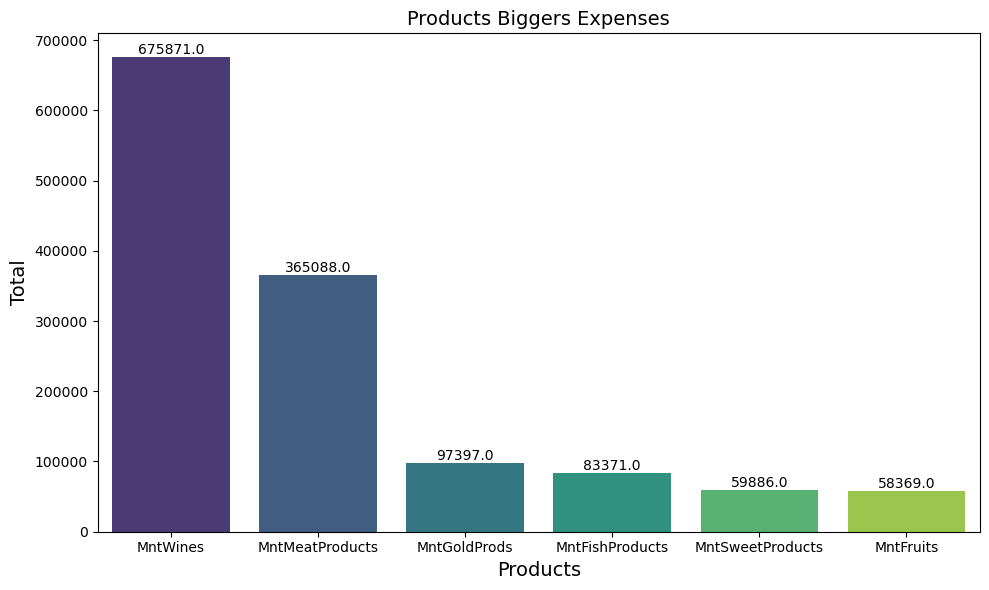

In [79]:
### Categoria de Produto x Clientes com Maiores Gastos

# Categorias de produtos
products = ['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Cria o dataframe com os totais
df_products = pd.DataFrame(data[products].sum(), columns = ['Sum']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Sum', 
                 data = df_products.sort_values('Sum', ascending = False), 
                 palette = 'viridis')

# Labels
plt.xlabel('Products', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Products Biggers Expenses', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display 
plt.tight_layout()
plt.show()

<Axes: xlabel='Response_Campaign', ylabel='MntWines'>

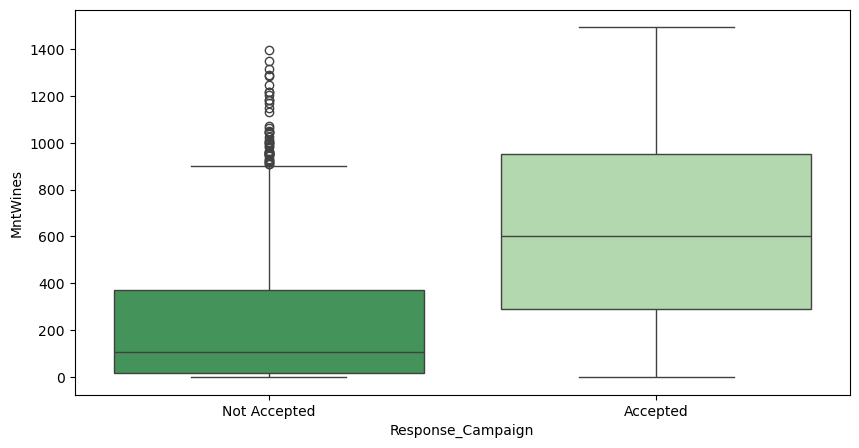

In [80]:
#Vinhos X Resposta a Campanhas

plt.figure(figsize= (10, 5))
sns.boxplot(x = 'Response_Campaign', y = 'MntWines', data= data, palette='Greens_r')

<Axes: xlabel='Response_Campaign', ylabel='Income'>

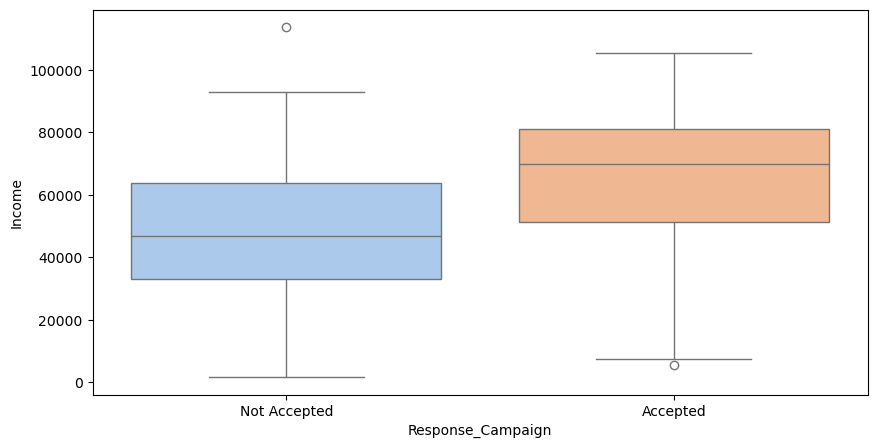

In [81]:
##  Income x Campaign

plt.figure(figsize= (10, 5))
sns.boxplot(x = 'Response_Campaign', y = 'Income', data= data, palette='pastel')

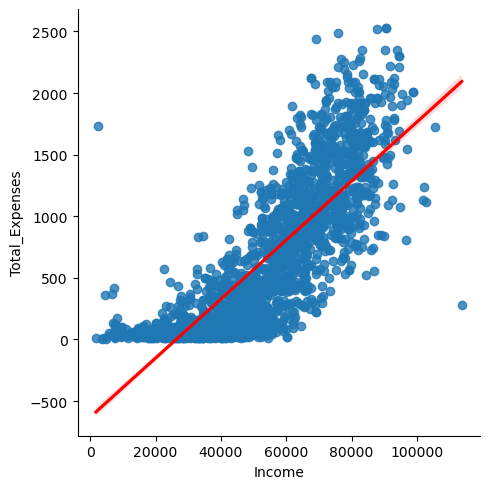

In [82]:
### Income x Total_Expenses

sns.lmplot(x= 'Income', y= 'Total_Expenses', data=data, palette='blue', line_kws={'color': 'red'})

In [83]:
## Fatores que são relevantes para explicar a decisão do cliente de aceitar ou não a campanha

data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Response_Campaign
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,67,663,22,1617,Not Accepted
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,70,113,4,27,Not Accepted
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,59,312,20,776,Not Accepted
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,40,139,6,53,Not Accepted
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,43,161,14,422,Not Accepted


In [84]:
# Transformando variáveis texto em numericas em One-Hot Encoding

data_imp = pd.get_dummies(data, columns=['Education', 'Marital_Status'])

In [85]:
data_imp.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Age', 'Days_as_Customer', 'Total_Purchases',
       'Total_Expenses', 'Response_Campaign', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [86]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Response_Campaign
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,67,663,22,1617,Not Accepted
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,70,113,4,27,Not Accepted
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,59,312,20,776,Not Accepted
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,40,139,6,53,Not Accepted
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,43,161,14,422,Not Accepted


In [87]:
## Removendo variáveis desnecessárias

X = data_imp.drop(['ID', 
                   'MntWines',
                   'MntFruits', 
                   'MntMeatProducts', 
                   'MntFishProducts', 
                   'MntSweetProducts',
                   'MntGoldProds', 
                   'NumWebPurchases',
                   'NumCatalogPurchases', 
                   'NumStorePurchases', 
                   'AcceptedCmp1',
                   'AcceptedCmp2',
                   'AcceptedCmp3',
                   'AcceptedCmp4', 
                   'AcceptedCmp5', 
                   'Response_Campaign'], axis= 1)

In [88]:
## Converte variaveis em representação numérica

y = data_imp['Response_Campaign'].map({'Not Accepted': 0, 'Accepted': 1})

In [89]:
model_rf = RandomForestClassifier(random_state= 43)

In [90]:
# Treinando modelo

model_data = model_rf.fit(X, y)

In [91]:
importances = model_data.feature_importances_

In [92]:
std = np.std([tree.feature_importances_ for tree in model_data.estimators_], axis=0)

In [93]:
indices = np.argsort(importances)

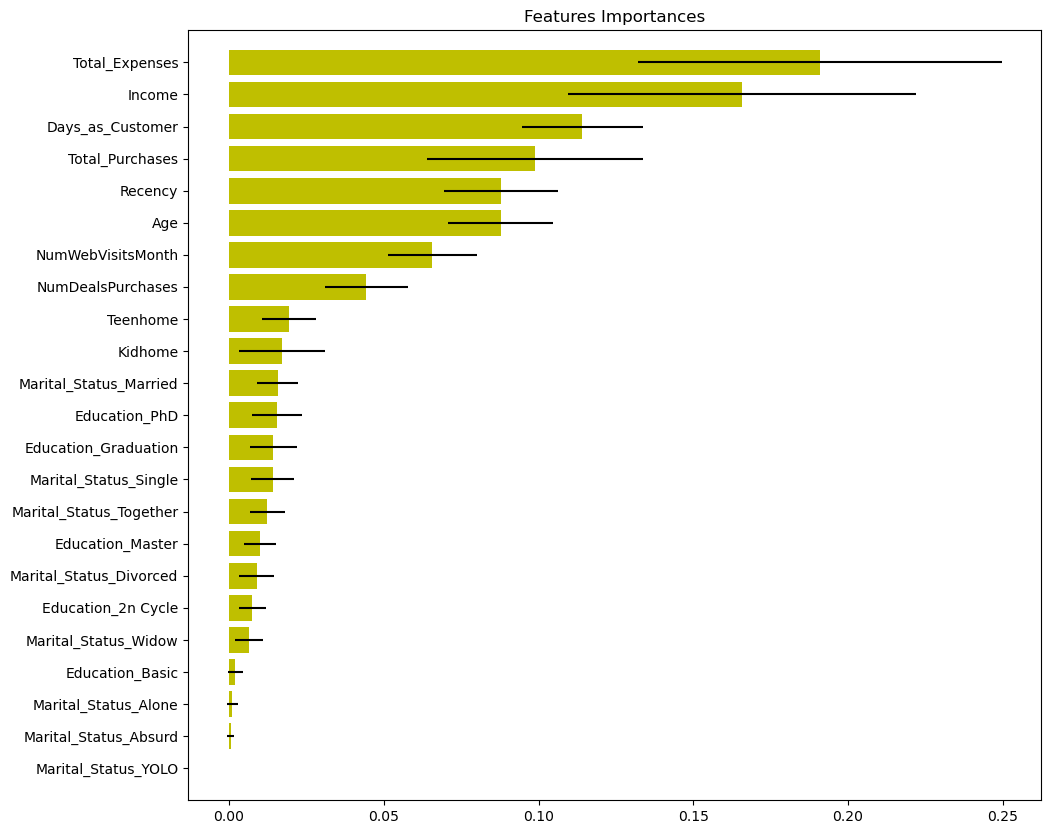

In [94]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Features Importances")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

#### Aplicando Teste de Hipóteses

Nível educacional não parece relevante para explicar resposta do cliente as campanhas de marketing. Ao contrário de Renda. 
Será que a média de renda é diferente entre os níveis educacionais?

Hipótese: Existe diferenaça significativa entre as médias de Renda dos clientes com Ensiono Superior e Sem Ensino Superior?

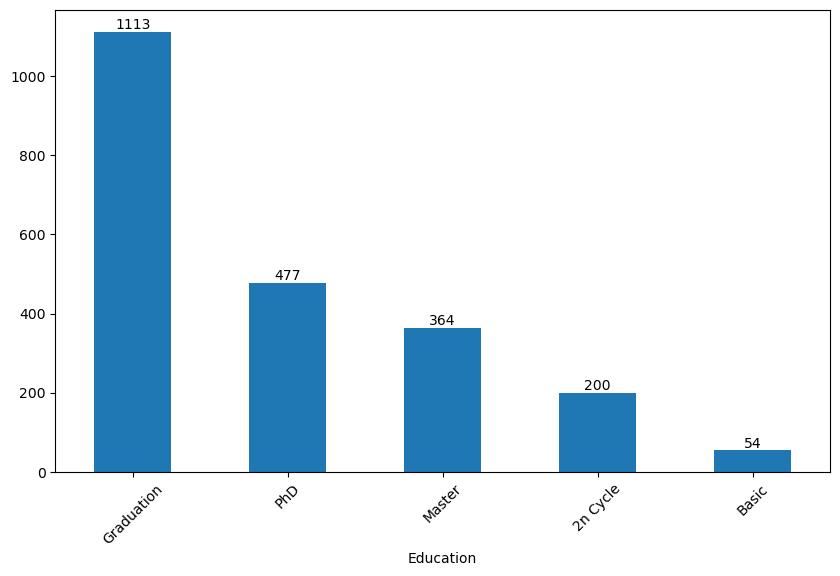

In [95]:
# Plot Customers x Education

plt.figure(figsize= (10, 6))
ax = data.Education.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [96]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age',
       'Days_as_Customer', 'Total_Purchases', 'Total_Expenses',
       'Response_Campaign'],
      dtype='object')

In [98]:
# Média por nível Educacional

mean_income = data.groupby('Education')['Income'].mean().reset_index()
mean_income = mean_income.sort_values(by = 'Income')

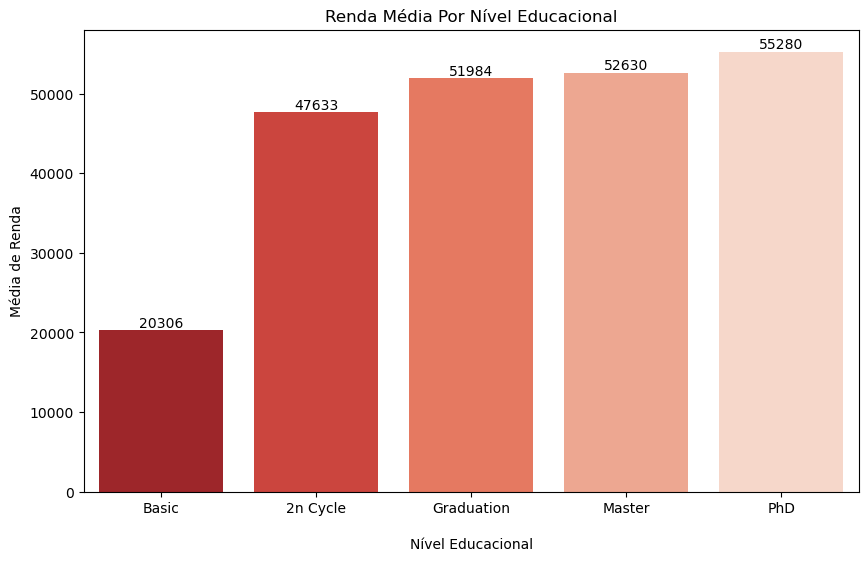

In [103]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = mean_income['Education'], y = mean_income['Income'], data = data, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

### Definition Hypotheses

- H0 (Hipótese Nula): Não há diferença significativa nas médias de renda de grupos com e sem nível de educação superior.
- H1 (Hipótese Alternativa): Há uma diferença significativa nas médias de renda de grupos com e sem nível de educação superior.

- Valor-p Baixo (< 0,05): Rejeita hipótese nula, sugerindo que há evidencias suficientes para afirmar que existe uma diferença significativa nas médias de renda entre os grupos.
- Valor-p Alto (> 0,05): Se o valor for maior que o nível de significância, não rejeita a hipótese nula, sugerindo que não há evidencias suficientes para afirmar que existe uma diferença significativa nas médias de renda entre os grupos.

##### Verificação se as variáveis seguem distribuição normal para escolha do teste de Hipóteses

In [104]:
# Variavel Categorica Education, transformando em variável numérica

data['Education'] = data['Education'].map({'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5})

In [105]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Days_as_Customer,Total_Purchases,Total_Expenses,Response_Campaign
0,5524,3,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,67,663,22,1617,Not Accepted
1,2174,3,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,70,113,4,27,Not Accepted
2,4141,3,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,59,312,20,776,Not Accepted
3,6182,3,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,40,139,6,53,Not Accepted
4,5324,5,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,43,161,14,422,Not Accepted


In [106]:
data_test = data[['Income', 'Education']]

In [107]:
data_test.head()

,Income,Education
0,58138.0,3
1,46344.0,3
2,71613.0,3
3,26646.0,3
4,58293.0,5


In [108]:
## Aplicando Teste de normalidade para verificar se a distribuição é normal

## Teste Shapiro Wilk

def data_test_normal(columns):
    for column in columns:
        statistic, p_value = shapiro(data_test[column])
        alpha = 0.05
        
        if p_value < alpha: 
            print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a H0 do Teste Shapiro Wilk: Os dados não são normalmente distribuídos.')
        else:
            print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falhamos em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

In [109]:
data_test_normal(data_test)


Income: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro Wilk: Os dados não são normalmente distribuídos.

Education: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro Wilk: Os dados não são normalmente distribuídos.


#### Aplicando Teste não-paramétrico

In [110]:
#### Teste Mann-Whitney U compara as diferença entre dois grupos independentes quando não há distribuição normal nos dados

graduation_with_group = data[data['Education'].isin([5, 4, 3])]['Income']
graduation_without_group = data[data['Education'].isin([1, 2])]['Income']

In [118]:
# Teste

statistic, p_value = mannwhitneyu(graduation_with_group, graduation_without_group)

alpha = 0.05

if p_value < alpha:
    print(f'\nAlpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda')
    #print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.")
else:
    print(f'\n{p_value:.2f} - Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda')
    #print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda.")


Alpha 0.05 < valor-p 0.00 - Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda


#### Conclusion

Os fatores mais relevantes que explicam a resposta dos clientes às campanhas de Marketing são:
-  Total Expenses (Total Gasto)
-  Income (Renda)
-  Dias como Cliente 
-  Total Purshases
-  Frequência
-  Age


![alt text](image.png)

Ou seja, clientes fiéis estão mais propensos a aceitar campanhas de Marketing.


O nível educacional e o estado civil não parecem ser fatores relevantes para explicar a resposta à campanha de Marketing. 

Comprovação através da aplicação de um teste de hipóteses.

Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem graduação, ficou evidente que existe diferença. 

Vimos ainda que níveis educacionais mais altos têm média de renda maior.

![alt text](image-1.png)

A sugestão é a empresa segmentar suas campanhas de Marketing para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional
E pode considerar a segmentação de campanha incluindo o histórico de gasto total, o tempo total como cliente, idade e total de compras anteriores.